# $\mathrm{\mathbb{P}}$ with $D_b$ feature massplanes

**Goal:** Let's make some massplanes w/ these newer trainings as well (woo, woo!!)

In [1]:
import dask.dataframe as dd
import pyarrow.parquet as pq
import pyarrow as pa

import os
os.sys.path+= ['../RRevolution/code/','../code/']
from analysis import getXhh
from utils import mcToYr

from plotting import SR_x, SR_y1, SR_y2
from plotting import CR_x, CR_y1, CR_y2
from plotting import SB_x, SB_y1, SB_y2

import pandas as pd
import numpy as np
from tqdm import tqdm
import json
from itertools import product
from glob import glob
import uproot

import matplotlib.pyplot as plt
from matplotlib import gridspec

# Let's do ATLAS style plots too!
import matplotlib as mpl
os.sys.path.append( "../PyATLASstyle/")
import PyATLASstyle as pas
pas.applyATLASstyle(mpl)

Running w/ conda env: don't import root packages.


../PyATLASstyle/PyATLASstyle.py:12: MatplotlibDeprecationWarning: 
The createFontList function was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use FontManager.addfont instead.
  font_list = font_manager.createFontList(font_files)


**Step 1:** Let's look at the massplanes

In [27]:
fileTag = 'preLN_lr_0p003'
title = '$\mathrm{\mathbb{P}} \ D_b$'

#fileTag = 'btag_5j'
#title = '$\mathrm{\mathbb{P}} \ b$-tag'

prodTag = 'JUN20'
nSelectedJets = 5

In [5]:
len(glob(f'../data/data17-{prodTag}-{nSelectedJets}jets/files/df_{fileTag}_2b_Db_sort_period?_00*.parquet'))

434

In [25]:
# Load in 2b
dat_2b = dd.read_parquet(f'../data/data17-{prodTag}-{nSelectedJets}jets/files/df_{fileTag}_2b_Db_sort_period?_00*.parquet',
                         columns=['X_wt','m_h1','m_h2','bucket','m_hh','abs_deta_hh'])

In [26]:
df_2b = dat_2b.loc[dat_2b.abs_deta_hh < 1.5,['X_wt','m_h1','m_h2','bucket','m_hh']].compute()

In [22]:
len(glob(f'../data/data17-{prodTag}-{nSelectedJets}jets/files/df_btag_5j_3b_Db_sort_period?_00*.parquet'))

434

In [21]:
f'../data/data17-{prodTag}-{nSelectedJets}jets/files/df_{fileTag}_3b_Db_sort_period?_00*.parquet'

'../data/data17-JUN20-5jets/files/df_btag_5j_3b_Db_sort_period?_00*.parquet'

In [23]:
# Load in 3b

cols = ['X_wt','m_h1','m_h2','bucket','m_hh','ntag','kinematic_region','j3_Db','MDR','MDpT','abs_deta_hh','pT_4']
cols += ['Db_h1_j1','Db_h1_j2','Db_h2_j1','Db_h2_j2']
dd_3b = dd.read_parquet(f'../data/data17-{prodTag}-{nSelectedJets}jets/files/df_{fileTag}_3b_Db_sort_period?_00*.parquet',
                        columns=cols)

df_3b = dd_3b.compute()

In [24]:
c0 = 'grey'
c1 = 'k'

In [29]:
pairing = "$\mathbf{ATLAS}$ Simulation Internal\n"
pairing += f"data17, {prodTag} MNT prod\nDL1r 77% WP"

In [30]:
preXwt = "$\mathbf{ATLAS}$ Simulation Internal\n"
preXwt += f"data17, {prodTag} MNT prod\n"
preXwt += "DL1r 77% WP, $|\Delta \eta_{hh}|$ < 1.5"

In [31]:
fmp = "$\mathbf{ATLAS}$ Simulation Internal\n"
fmp += f"data17, {prodTag} MNT prod\n"
fmp += "DL1r 77% WP, $|\Delta \eta_{hh}|$ < 1.5, $X_{wt}$ > 1.5"

In [32]:
x0, y0 = 120,110
x1,y1 = 125,116


#r_SR = 1.6
#SR_x_new = np.linspace(x1 / (1 + 0.1 * r_SR), x1 / (1 - 0.1 * r_SR))

SR_x_new = np.linspace(x1 / 1.16, x1 / 0.840000000001)

alpha = np.power(10*(SR_x_new - x1)/SR_x_new,2)
SR_y1_new = y1 / (1 + 0.1 * np.sqrt(np.power(1.6,2) - alpha))
SR_y2_new = y1 / (1 - 0.1 * np.sqrt(np.power(1.6,2) - alpha))

# CR_x = np.linspace(124-30,124+30)
# beta = np.sqrt(30**2 - np.power(CR_x-124, 2))
# CR_y1 = 113 + beta
# CR_y2 = 113 - beta

# SB_x = np.linspace(126-45,126+45)
# gamma = np.sqrt(45**2 - np.power(SB_x-126, 2))
# SB_y1 = 116 + gamma
# SB_y2 = 116 - gamma

Substituting with a symbol from Computer Modern.
Substituting with a symbol from Computer Modern.


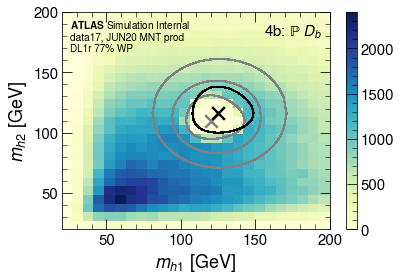

Substituting with a symbol from Computer Modern.
Substituting with a symbol from Computer Modern.


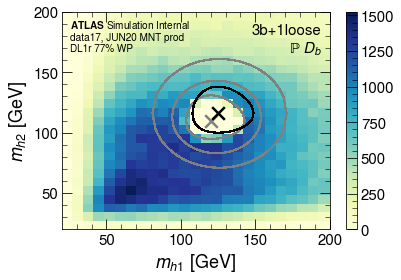

Substituting with a symbol from Computer Modern.
Substituting with a symbol from Computer Modern.


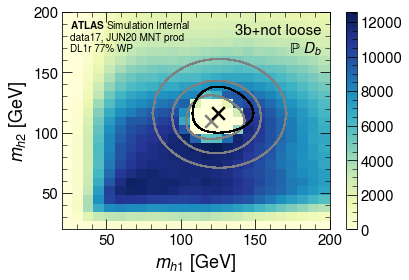

In [33]:
for tag_id, mi in zip(['4b','3b+1loose','3b+not loose'],
                      [df_3b.ntag>=4,(df_3b.ntag==3)&(df_3b.j3_Db==2),(df_3b.ntag==3)&(df_3b.j3_Db==1)]):

    
    plt.figure()

    plt.hist2d(*df_3b.loc[mi & (df_3b.kinematic_region!= 0),['m_h1','m_h2']].values.T,
               25,[(20,200),(20,200)],cmap='YlGnBu')
    
    plt.colorbar()
    plt.xlabel('$m_{h1}$ [GeV]',fontsize=18)
    plt.ylabel('$m_{h2}$ [GeV]',fontsize=18)
    
    ax = plt.gca()
    plt.text(.97,.95,f'{tag_id}: {title}' if tag_id == '4b' else f'{tag_id}\n{title}',
             transform=ax.transAxes,ha='right',va='top',fontsize=15)
    plt.text(0.03,0.97,pairing,transform=ax.transAxes,ha='left',va='top',fontsize=10)
    
    # Overlay our region definitions
    plt.scatter([x0],[y0],160,marker='x',color=c0)
    plt.plot(np.hstack([SR_x,SR_x[::-1]]),np.hstack([SR_y1,SR_y2[::-1]]),color=c0,lw=1.2)
    plt.plot(np.hstack([CR_x,CR_x[::-1]]),np.hstack([CR_y1,CR_y2[::-1]]),color=c0,lw=1.2)
    plt.plot(np.hstack([SB_x,SB_x[::-1]]),np.hstack([SB_y1,SB_y2[::-1]]),color=c0,lw=1.2)
        
    plt.scatter([x1],[y1],160,marker='x',color=c1)    
    plt.plot(np.hstack([SR_x_new,SR_x_new[::-1]]),
             np.hstack([SR_y1_new,SR_y2_new[::-1]]),
             color=c1,lw=1.2)

Substituting with a symbol from Computer Modern.
Substituting with a symbol from Computer Modern.


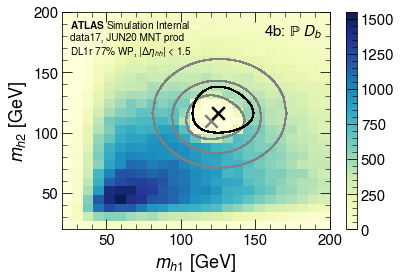

Substituting with a symbol from Computer Modern.
Substituting with a symbol from Computer Modern.


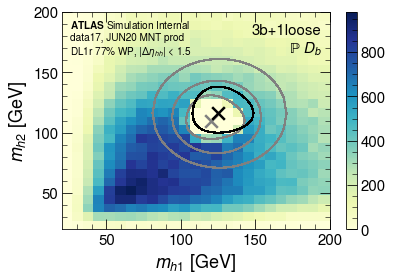

Substituting with a symbol from Computer Modern.
Substituting with a symbol from Computer Modern.


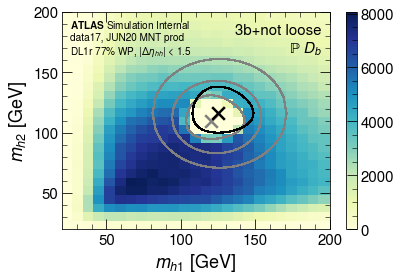

In [34]:
for tag_id, mi in zip(['4b','3b+1loose','3b+not loose'],
                      [df_3b.ntag>=4,(df_3b.ntag==3)&(df_3b.j3_Db==2),(df_3b.ntag==3)&(df_3b.j3_Db==1)]):

    
    plt.figure()

    plt.hist2d(*df_3b.loc[mi & (df_3b.kinematic_region!= 0) & (df_3b.abs_deta_hh < 1.5),['m_h1','m_h2']].values.T,
               25,[(20,200),(20,200)],cmap='YlGnBu')
    
    plt.colorbar()
    plt.xlabel('$m_{h1}$ [GeV]',fontsize=18)
    plt.ylabel('$m_{h2}$ [GeV]',fontsize=18)
    
    ax = plt.gca()
    plt.text(.97,.95,f'{tag_id}: {title}' if tag_id == '4b' else f'{tag_id}\n{title}',
             transform=ax.transAxes,ha='right',va='top',fontsize=15)
    plt.text(0.03,0.97,preXwt,transform=ax.transAxes,ha='left',va='top',fontsize=10)
    
    # Overlay our region definitions
    plt.scatter([x0],[y0],160,marker='x',color=c0)
    plt.plot(np.hstack([SR_x,SR_x[::-1]]),np.hstack([SR_y1,SR_y2[::-1]]),color=c0,lw=1.2)
    plt.plot(np.hstack([CR_x,CR_x[::-1]]),np.hstack([CR_y1,CR_y2[::-1]]),color=c0,lw=1.2)
    plt.plot(np.hstack([SB_x,SB_x[::-1]]),np.hstack([SB_y1,SB_y2[::-1]]),color=c0,lw=1.2)
        
    plt.scatter([x1],[y1],160,marker='x',color=c1)    
    plt.plot(np.hstack([SR_x_new,SR_x_new[::-1]]),
             np.hstack([SR_y1_new,SR_y2_new[::-1]]),
             color=c1,lw=1.2)

**Q:** What's up with the bumps?

Substituting with a symbol from Computer Modern.
Substituting with a symbol from Computer Modern.


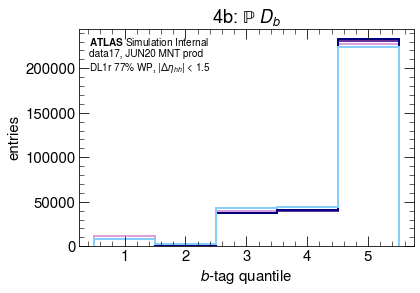

Substituting with a symbol from Computer Modern.
Substituting with a symbol from Computer Modern.


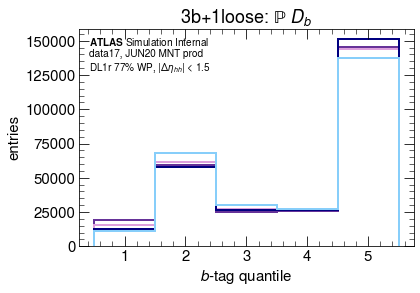

Substituting with a symbol from Computer Modern.
Substituting with a symbol from Computer Modern.


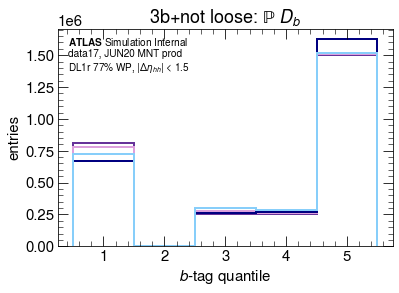

In [35]:
for tag_id, mi in zip(['4b','3b+1loose','3b+not loose'],
                      [df_3b.ntag>=4,(df_3b.ntag==3)&(df_3b.j3_Db==2),(df_3b.ntag==3)&(df_3b.j3_Db==1)]):

    
    plt.figure()

    m = mi & (df_3b.kinematic_region!= 0) & (df_3b.abs_deta_hh < 1.5)

    for col, color in zip(['Db_h1_j1','Db_h1_j2','Db_h2_j1','Db_h2_j2'],
                          ['rebeccapurple','plum','navy','lightskyblue']):

        plt.hist(df_3b.loc[m,col],5,(0.5,5.5),histtype='step',lw=2,label=col,color=color)
    
    plt.xlabel('$b$-tag quantile')
    plt.ylabel('entries')
    
    plt.title(f'{tag_id}: {title}')
    
    ax = plt.gca()
    plt.text(0.03,0.97,preXwt,transform=ax.transAxes,ha='left',va='top',fontsize=10)
    

Message: not-b mostly in the subleading HC (as Sean was saying)

Substituting with a symbol from Computer Modern.
Substituting with a symbol from Computer Modern.


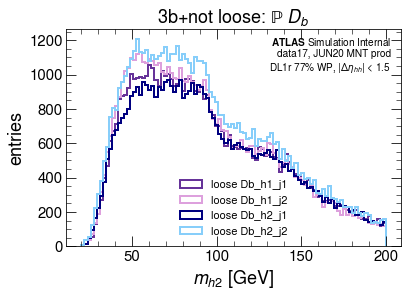

Substituting with a symbol from Computer Modern.
Substituting with a symbol from Computer Modern.


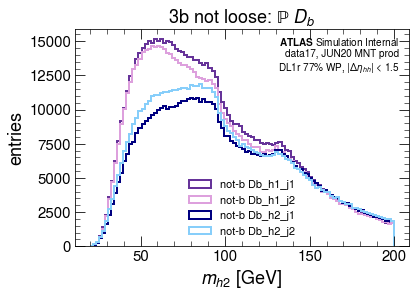

In [36]:
plt.figure()

# 3b + 1 loose
m = (df_3b.ntag==3) & (df_3b.kinematic_region!= 0) & (df_3b.abs_deta_hh < 1.5)

for col, color in zip(['Db_h1_j1','Db_h1_j2','Db_h2_j1','Db_h2_j2'],
                      ['rebeccapurple','plum','navy','lightskyblue']):

    plt.hist(df_3b.loc[m & (df_3b[col]==2),'m_h2'],100,(20,200),
             histtype='step',lw=2,label=f'loose {col}',color=color)

plt.xlabel('$m_{h2}$ [GeV]',fontsize=18)
plt.ylabel('entries',fontsize=18)

plt.title(f'{tag_id}: {title}')
plt.legend(loc='lower center',fontsize=11)

ax = plt.gca()
plt.text(0.97,0.97,preXwt,transform=ax.transAxes,ha='right',va='top',fontsize=10)


# 3b 
plt.figure()
for col, color in zip(['Db_h1_j1','Db_h1_j2','Db_h2_j1','Db_h2_j2'],
                      ['rebeccapurple','plum','navy','lightskyblue']):

    plt.hist(df_3b.loc[m & (df_3b[col]==1),'m_h2'],100,(20,200),
             histtype='step',lw=2,label=f'not-b {col}',color=color)

plt.xlabel('$m_{h2}$ [GeV]',fontsize=18)
plt.ylabel('entries',fontsize=18)

plt.title(f'3b not loose: {title}')
plt.legend(loc='lower center',fontsize=11)

ax = plt.gca()
plt.text(0.97,0.97,preXwt,transform=ax.transAxes,ha='right',va='top',fontsize=10)
plt.show()

Substituting with a symbol from Computer Modern.
Substituting with a symbol from Computer Modern.


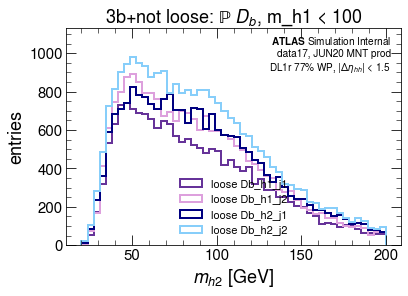

Substituting with a symbol from Computer Modern.
Substituting with a symbol from Computer Modern.


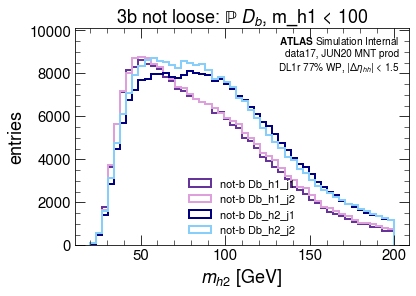

In [38]:
plt.figure()

# 3b + 1 loose
m = (df_3b.ntag==3) & (df_3b.kinematic_region!= 0) & (df_3b.abs_deta_hh < 1.5) & (df_3b.m_h1 < 100)

for col, color in zip(['Db_h1_j1','Db_h1_j2','Db_h2_j1','Db_h2_j2'],
                      ['rebeccapurple','plum','navy','lightskyblue']):

    plt.hist(df_3b.loc[m & (df_3b[col]==2),'m_h2'],50,(20,200),
             histtype='step',lw=2,label=f'loose {col}',color=color)

plt.xlabel('$m_{h2}$ [GeV]',fontsize=18)
plt.ylabel('entries',fontsize=18)

plt.title(f'{tag_id}: {title}, m_h1 < 100')
plt.legend(loc='lower center',fontsize=11)

ax = plt.gca()
plt.text(0.97,0.97,preXwt,transform=ax.transAxes,ha='right',va='top',fontsize=10)

_,ymax = plt.ylim()
plt.ylim(0,1.1*ymax)

# 3b 
plt.figure()
for col, color in zip(['Db_h1_j1','Db_h1_j2','Db_h2_j1','Db_h2_j2'],
                      ['rebeccapurple','plum','navy','lightskyblue']):

    plt.hist(df_3b.loc[m & (df_3b[col]==1),'m_h2'],50,(20,200),
             histtype='step',lw=2,label=f'not-b {col}',color=color)

plt.xlabel('$m_{h2}$ [GeV]',fontsize=18)
plt.ylabel('entries',fontsize=18)

plt.title(f'3b not loose: {title}, m_h1 < 100')
plt.legend(loc='lower center',fontsize=11)

ax = plt.gca()
plt.text(0.97,0.97,preXwt,transform=ax.transAxes,ha='right',va='top',fontsize=10)

_,ymax = plt.ylim()
plt.ylim(0,1.1*ymax)

plt.show()

Substituting with a symbol from Computer Modern.
Substituting with a symbol from Computer Modern.


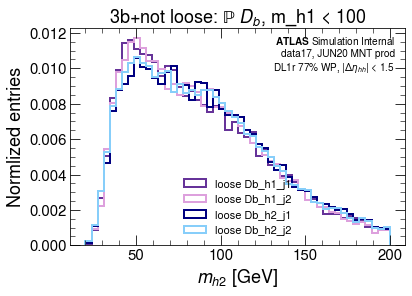

Substituting with a symbol from Computer Modern.
Substituting with a symbol from Computer Modern.


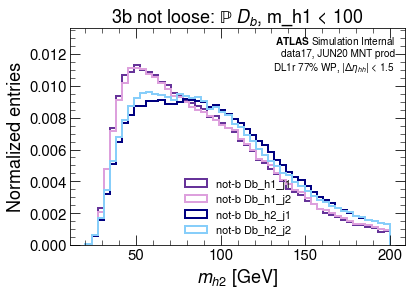

In [39]:
plt.figure()

# 3b + 1 loose
m = (df_3b.ntag==3) & (df_3b.kinematic_region!= 0) & (df_3b.abs_deta_hh < 1.5) & (df_3b.m_h1 < 100)

for col, color in zip(['Db_h1_j1','Db_h1_j2','Db_h2_j1','Db_h2_j2'],
                      ['rebeccapurple','plum','navy','lightskyblue']):

    plt.hist(df_3b.loc[m & (df_3b[col]==2),'m_h2'],50,(20,200),
             histtype='step',lw=2,label=f'loose {col}',color=color,density=True)

plt.xlabel('$m_{h2}$ [GeV]',fontsize=18)
plt.ylabel('Normlized entries',fontsize=18)

plt.title(f'{tag_id}: {title}, m_h1 < 100')
plt.legend(loc='lower center',fontsize=11)

ax = plt.gca()
plt.text(0.97,0.97,preXwt,transform=ax.transAxes,ha='right',va='top',fontsize=10)


# 3b 
plt.figure()
for col, color in zip(['Db_h1_j1','Db_h1_j2','Db_h2_j1','Db_h2_j2'],
                      ['rebeccapurple','plum','navy','lightskyblue']):

    plt.hist(df_3b.loc[m & (df_3b[col]==1),'m_h2'],50,(20,200),
             histtype='step',lw=2,label=f'not-b {col}',color=color,density=True)

plt.xlabel('$m_{h2}$ [GeV]',fontsize=18)
plt.ylabel('Normalized entries',fontsize=18)

plt.title(f'3b not loose: {title}, m_h1 < 100')
plt.legend(loc='lower center',fontsize=11)

ax = plt.gca()
plt.text(0.97,0.97,preXwt,transform=ax.transAxes,ha='right',va='top',fontsize=10)

_,ymax = plt.ylim()
plt.ylim(0,1.15*ymax)

plt.show()

If I put these plots in a talk, I should probably just highlight when the b-tag is in the the lead or subleading jet.

Substituting with a symbol from Computer Modern.
Substituting with a symbol from Computer Modern.


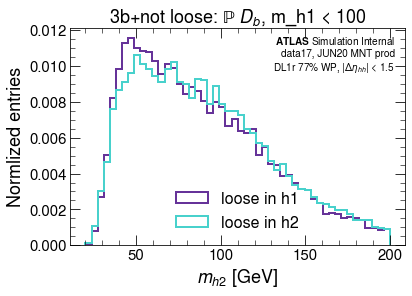

Substituting with a symbol from Computer Modern.
Substituting with a symbol from Computer Modern.


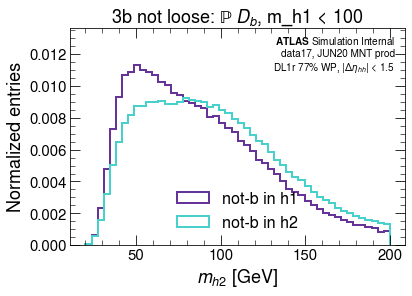

In [40]:
plt.figure()

# 3b + 1 loose
m = (df_3b.kinematic_region!= 0) & (df_3b.abs_deta_hh < 1.5) & (df_3b.m_h1 < 100)

for i, color in zip([1,2],['rebeccapurple','mediumturquoise']):

    plt.hist(df_3b.loc[m & ((df_3b[f'Db_h{i}_j1']==2) | (df_3b[f'Db_h{i}_j1']==2)),'m_h2'],
             50,(20,200),histtype='step',lw=2,label=f'loose in h{i}',color=color,density=True)

plt.xlabel('$m_{h2}$ [GeV]',fontsize=18)
plt.ylabel('Normlized entries',fontsize=18)

plt.title(f'{tag_id}: {title}, m_h1 < 100')
plt.legend(loc='lower center',fontsize=16)

ax = plt.gca()
plt.text(0.97,0.97,preXwt,transform=ax.transAxes,ha='right',va='top',fontsize=10)


# 3b 
plt.figure()
for i, color in zip([1,2],['rebeccapurple','mediumturquoise']):

    plt.hist(df_3b.loc[m & ((df_3b[f'Db_h{i}_j1']==1) | (df_3b[f'Db_h{i}_j1']==1)),'m_h2'],
             50,(20,200),histtype='step',lw=2,label=f'not-b in h{i}',color=color,density=True)

plt.xlabel('$m_{h2}$ [GeV]',fontsize=18)
plt.ylabel('Normalized entries',fontsize=18)

plt.title(f'3b not loose: {title}, m_h1 < 100')
plt.legend(loc='lower center',fontsize=16)

ax = plt.gca()
plt.text(0.97,0.97,preXwt,transform=ax.transAxes,ha='right',va='top',fontsize=10)

_,ymax = plt.ylim()
plt.ylim(0,1.15*ymax)

plt.show()

Substituting with a symbol from Computer Modern.
Substituting with a symbol from Computer Modern.


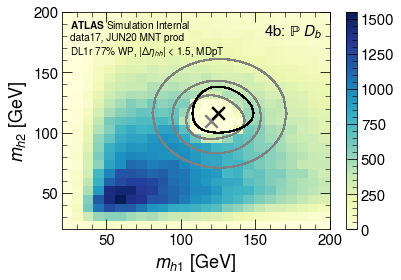

Substituting with a symbol from Computer Modern.
Substituting with a symbol from Computer Modern.


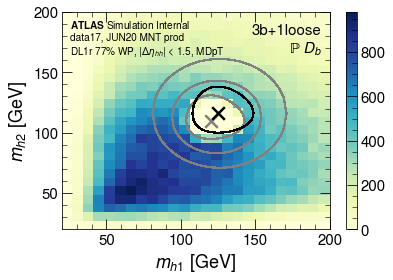

Substituting with a symbol from Computer Modern.
Substituting with a symbol from Computer Modern.


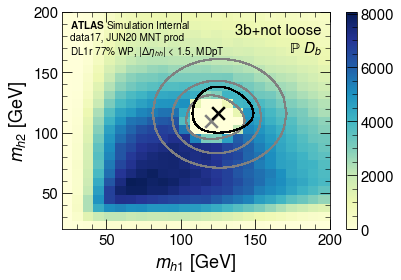

In [43]:
for tag_id, mi in zip(['4b','3b+1loose','3b+not loose'],
                      [df_3b.ntag>=4,(df_3b.ntag==3)&(df_3b.j3_Db==2),(df_3b.ntag==3)&(df_3b.j3_Db==1)]):

    
    plt.figure()

    m = mi & (df_3b.kinematic_region!= 0) & (df_3b.abs_deta_hh < 1.5) & df_3b.MDpT
    plt.hist2d(*df_3b.loc[m,['m_h1','m_h2']].values.T,
               25,[(20,200),(20,200)],cmap='YlGnBu')
    
    plt.colorbar()
    plt.xlabel('$m_{h1}$ [GeV]',fontsize=18)
    plt.ylabel('$m_{h2}$ [GeV]',fontsize=18)
    
    ax = plt.gca()
    plt.text(.97,.95,f'{tag_id}: {title}' if tag_id == '4b' else f'{tag_id}\n{title}',
             transform=ax.transAxes,ha='right',va='top',fontsize=15)
    plt.text(0.03,0.97,preXwt+', MDpT',transform=ax.transAxes,ha='left',va='top',fontsize=10)
    
    # Overlay our region definitions
    plt.scatter([x0],[y0],160,marker='x',color=c0)
    plt.plot(np.hstack([SR_x,SR_x[::-1]]),np.hstack([SR_y1,SR_y2[::-1]]),color=c0,lw=1.2)
    plt.plot(np.hstack([CR_x,CR_x[::-1]]),np.hstack([CR_y1,CR_y2[::-1]]),color=c0,lw=1.2)
    plt.plot(np.hstack([SB_x,SB_x[::-1]]),np.hstack([SB_y1,SB_y2[::-1]]),color=c0,lw=1.2)
        
    plt.scatter([x1],[y1],160,marker='x',color=c1)    
    plt.plot(np.hstack([SR_x_new,SR_x_new[::-1]]),
             np.hstack([SR_y1_new,SR_y2_new[::-1]]),
             color=c1,lw=1.2)

And... let's *also* look at it for the inverted $\Delta \eta_{hh}$ cut.

Substituting with a symbol from Computer Modern.
Substituting with a symbol from Computer Modern.


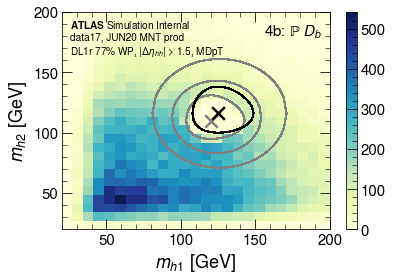

Substituting with a symbol from Computer Modern.
Substituting with a symbol from Computer Modern.


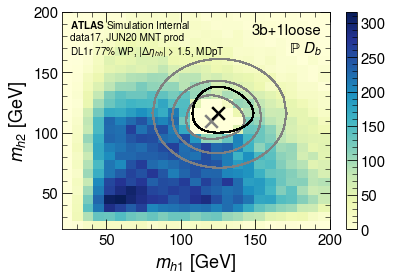

Substituting with a symbol from Computer Modern.
Substituting with a symbol from Computer Modern.


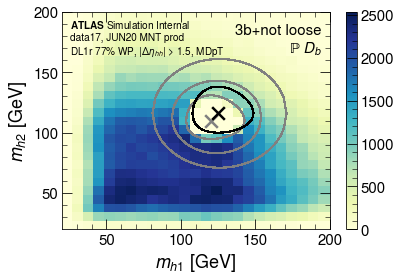

In [45]:
for tag_id, mi in zip(['4b','3b+1loose','3b+not loose'],
                      [df_3b.ntag>=4,(df_3b.ntag==3)&(df_3b.j3_Db==2),(df_3b.ntag==3)&(df_3b.j3_Db==1)]):

    
    plt.figure()

    m = mi & (df_3b.kinematic_region!= 0) & (df_3b.abs_deta_hh > 1.5) & df_3b.MDpT
    plt.hist2d(*df_3b.loc[m,['m_h1','m_h2']].values.T,
               25,[(20,200),(20,200)],cmap='YlGnBu')
    
    plt.colorbar()
    plt.xlabel('$m_{h1}$ [GeV]',fontsize=18)
    plt.ylabel('$m_{h2}$ [GeV]',fontsize=18)
    
    ax = plt.gca()
    plt.text(.97,.95,f'{tag_id}: {title}' if tag_id == '4b' else f'{tag_id}\n{title}',
             transform=ax.transAxes,ha='right',va='top',fontsize=15)
    plt.text(0.03,0.97,preXwt.replace('<','>')+', MDpT',transform=ax.transAxes,ha='left',va='top',fontsize=10)
    
    # Overlay our region definitions
    plt.scatter([x0],[y0],160,marker='x',color=c0)
    plt.plot(np.hstack([SR_x,SR_x[::-1]]),np.hstack([SR_y1,SR_y2[::-1]]),color=c0,lw=1.2)
    plt.plot(np.hstack([CR_x,CR_x[::-1]]),np.hstack([CR_y1,CR_y2[::-1]]),color=c0,lw=1.2)
    plt.plot(np.hstack([SB_x,SB_x[::-1]]),np.hstack([SB_y1,SB_y2[::-1]]),color=c0,lw=1.2)
        
    plt.scatter([x1],[y1],160,marker='x',color=c1)    
    plt.plot(np.hstack([SR_x_new,SR_x_new[::-1]]),
             np.hstack([SR_y1_new,SR_y2_new[::-1]]),
             color=c1,lw=1.2)

Interesting - it's a little "blobbier" for the invertedc $\Delta \eta_{hh}$ cut...

Substituting with a symbol from Computer Modern.
Substituting with a symbol from Computer Modern.


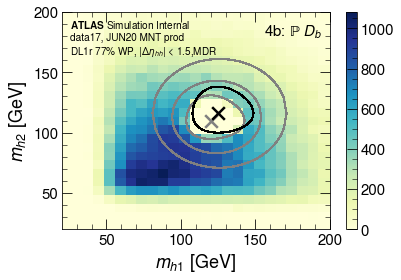

Substituting with a symbol from Computer Modern.
Substituting with a symbol from Computer Modern.


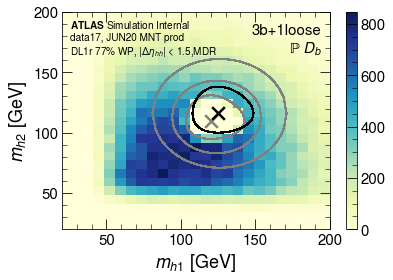

Substituting with a symbol from Computer Modern.
Substituting with a symbol from Computer Modern.


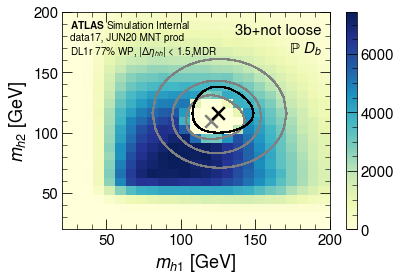

In [42]:
for tag_id, mi in zip(['4b','3b+1loose','3b+not loose'],
                      [df_3b.ntag>=4,(df_3b.ntag==3)&(df_3b.j3_Db==2),(df_3b.ntag==3)&(df_3b.j3_Db==1)]):

    
    plt.figure()

    m = mi & (df_3b.kinematic_region!= 0) & (df_3b.abs_deta_hh < 1.5) & df_3b.MDR
    plt.hist2d(*df_3b.loc[m,['m_h1','m_h2']].values.T,
               25,[(20,200),(20,200)],cmap='YlGnBu')
    
    plt.colorbar()
    plt.xlabel('$m_{h1}$ [GeV]',fontsize=18)
    plt.ylabel('$m_{h2}$ [GeV]',fontsize=18)
    
    ax = plt.gca()
    plt.text(.97,.95,f'{tag_id}: {title}' if tag_id == '4b' else f'{tag_id}\n{title}',
             transform=ax.transAxes,ha='right',va='top',fontsize=15)
    plt.text(0.03,0.97,preXwt+', MDR',transform=ax.transAxes,ha='left',va='top',fontsize=10)
    
    # Overlay our region definitions
    plt.scatter([x0],[y0],160,marker='x',color=c0)
    plt.plot(np.hstack([SR_x,SR_x[::-1]]),np.hstack([SR_y1,SR_y2[::-1]]),color=c0,lw=1.2)
    plt.plot(np.hstack([CR_x,CR_x[::-1]]),np.hstack([CR_y1,CR_y2[::-1]]),color=c0,lw=1.2)
    plt.plot(np.hstack([SB_x,SB_x[::-1]]),np.hstack([SB_y1,SB_y2[::-1]]),color=c0,lw=1.2)
        
    plt.scatter([x1],[y1],160,marker='x',color=c1)    
    plt.plot(np.hstack([SR_x_new,SR_x_new[::-1]]),
             np.hstack([SR_y1_new,SR_y2_new[::-1]]),
             color=c1,lw=1.2)

Substituting with a symbol from Computer Modern.
Substituting with a symbol from Computer Modern.


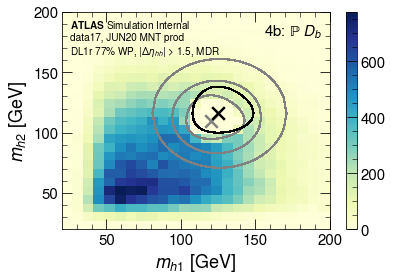

Substituting with a symbol from Computer Modern.
Substituting with a symbol from Computer Modern.


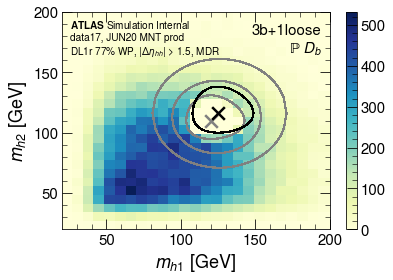

Substituting with a symbol from Computer Modern.
Substituting with a symbol from Computer Modern.


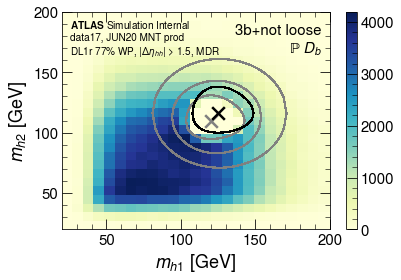

In [46]:
for tag_id, mi in zip(['4b','3b+1loose','3b+not loose'],
                      [df_3b.ntag>=4,(df_3b.ntag==3)&(df_3b.j3_Db==2),(df_3b.ntag==3)&(df_3b.j3_Db==1)]):
    
    plt.figure()

    m = mi & (df_3b.kinematic_region!= 0) & (df_3b.abs_deta_hh > 1.5) & df_3b.MDR
    plt.hist2d(*df_3b.loc[m,['m_h1','m_h2']].values.T,
               25,[(20,200),(20,200)],cmap='YlGnBu')
    
    plt.colorbar()
    plt.xlabel('$m_{h1}$ [GeV]',fontsize=18)
    plt.ylabel('$m_{h2}$ [GeV]',fontsize=18)
    
    ax = plt.gca()
    plt.text(.97,.95,f'{tag_id}: {title}' if tag_id == '4b' else f'{tag_id}\n{title}',
             transform=ax.transAxes,ha='right',va='top',fontsize=15)
    plt.text(0.03,0.97,preXwt.replace('<','>')+', MDR',transform=ax.transAxes,ha='left',va='top',fontsize=10)
    
    # Overlay our region definitions
    plt.scatter([x0],[y0],160,marker='x',color=c0)
    plt.plot(np.hstack([SR_x,SR_x[::-1]]),np.hstack([SR_y1,SR_y2[::-1]]),color=c0,lw=1.2)
    plt.plot(np.hstack([CR_x,CR_x[::-1]]),np.hstack([CR_y1,CR_y2[::-1]]),color=c0,lw=1.2)
    plt.plot(np.hstack([SB_x,SB_x[::-1]]),np.hstack([SB_y1,SB_y2[::-1]]),color=c0,lw=1.2)
        
    plt.scatter([x1],[y1],160,marker='x',color=c1)    
    plt.plot(np.hstack([SR_x_new,SR_x_new[::-1]]),
             np.hstack([SR_y1_new,SR_y2_new[::-1]]),
             color=c1,lw=1.2)

And next, let's look at some of the 2b plots as well!!

Substituting with a symbol from Computer Modern.
Substituting with a symbol from Computer Modern.


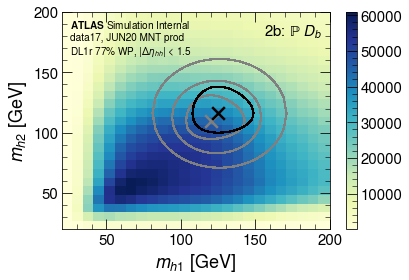

In [48]:
plt.figure()

plt.hist2d(df_2b['m_h1'],df_2b['m_h2'], 25,[(20,200),(20,200)],cmap='YlGnBu')

plt.colorbar()
plt.xlabel('$m_{h1}$ [GeV]',fontsize=18)
plt.ylabel('$m_{h2}$ [GeV]',fontsize=18)

ax = plt.gca()
plt.text(.97,.95,f'2b: {title}',
         transform=ax.transAxes,ha='right',va='top',fontsize=15)
plt.text(0.03,0.97,preXwt,transform=ax.transAxes,ha='left',va='top',fontsize=10)

# Overlay our region definitions
plt.scatter([x0],[y0],160,marker='x',color=c0)
plt.plot(np.hstack([SR_x,SR_x[::-1]]),np.hstack([SR_y1,SR_y2[::-1]]),color=c0,lw=1.2)
plt.plot(np.hstack([CR_x,CR_x[::-1]]),np.hstack([CR_y1,CR_y2[::-1]]),color=c0,lw=1.2)
plt.plot(np.hstack([SB_x,SB_x[::-1]]),np.hstack([SB_y1,SB_y2[::-1]]),color=c0,lw=1.2)

plt.scatter([x1],[y1],160,marker='x',color=c1)    
plt.plot(np.hstack([SR_x_new,SR_x_new[::-1]]),
         np.hstack([SR_y1_new,SR_y2_new[::-1]]),
         color=c1,lw=1.2)
plt.show()

But ok - nice, this looks *exactly* the same as expected.

Take a peek at the inverted $\Delta \eta_{hh}$ too... and then maybe also w/ the MDR + MDpT cuts??

## Next - let's also try to propose some new radii for VR / VR?

**Recall the definitions and their motivation**

Let $(x,y)$ define the SR center, and by default **fix** the SR radius at $r_{SR} = 1.6$ (since as Rafael mentioned, we want to avoid *galvanizing* the SR rn).

Then the VR is defined by 2 parameters: $\delta$ and $r_{VR}$

$$[m_{h1} - x*(1+\delta)]^2 + [m_{h2} - y*(1+\delta)]^2 < r_{VR}^2$$

where for the baselne analysis, $\delta = 0.03$ and $r_{VR}$ = 30 GeV.


And similarly the CR is defined by 2 parameters: $\varepsilon$ and $r_{CR}$

$$[m_{h1} - x*(1+\varepsilon)]^2 + [m_{h2} - y*(1+\varepsilon)]^2 < r_{CR}^2$$

with the baselne setting, $\varepsilon = 0.05$ and $r_{VR}$ = 45 GeV.

**Recall: SR opt for the signal**

In the last iteration of the analysis, we had a center at $(x_0, y_0) = (120, 110)$ GeV, but in the *other notebook* I reoptimized this for $(x_1, y_1) = (125,116)$ GeV.

So, I think I want to **optimize the VR** st it has the same $(m_{h1},m_{h2}) means as the SR, and the radius st the events are roughly compatible?

I think the means being compatible should be something I *do* on 2b and then *check* and *4b* (and then 3b, 3b + 1 loose)


In [52]:
deltas, r_VRs = np.meshgrid(np.linspace(0,.5,11),np.linspace(15,45,7))

df_2b['Xhh'] = getXhh(df_2b.m_h1,df_2b.m_h2,x0,y0)

In [54]:
mu_x0 = []
mu_y0 = []
for delta, r_VR in tqdm(zip(deltas.flatten(), r_VRs.flatten())):


    VR = np.sqrt((df_2b['m_h1'] - x0 * (1+delta))**2 + (df_2b['m_h2'] - y0 * (1+delta))**2) < r_VR
    VR = VR & (df_2b.Xhh > 1.6)

    mu_x0.append(df_2b.loc[VR,'m_h1'].mean())
    mu_y0.append(df_2b.loc[VR,'m_h2'].mean())
    

77it [01:02,  1.24it/s]


[[ 2.6689439   4.09378842]
 [ 2.40225248  4.88922104]
 [ 2.27815091  5.83635227]
 [ 2.45973643  7.22461188]
 [ 3.55278147 10.39641423]
 [ 6.57007435 14.57801619]
 [        nan 14.41209951]]
[[ 7.13732511  1.40127062]
 [ 6.19021047  0.06934844]
 [ 5.43119652  1.60641414]
 [ 5.02565788  3.49250584]
 [ 5.52596236  6.82351541]
 [ 9.85849582 13.50673489]
 [        nan 15.58734453]]


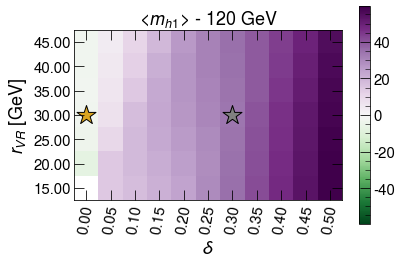

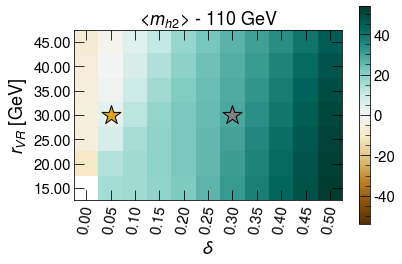

In [55]:
for mus, cmap, mean, var in zip([mu_x0,mu_y0],['PRGn_r','BrBG'],[x0,y0],['$m_{h1}$','$m_{h2}$']):
    
    z = np.array(mus).reshape(7,11) - mean
    
    v = np.max(np.abs(np.nan_to_num(z)))
    
    plt.figure()
    plt.imshow(z, cmap=cmap, vmin=-v, vmax=v, origin='lower')
    plt.colorbar()
    
    plt.xticks(range(11),[f'{d:.2f}' for d in deltas[0]],rotation=80)
    plt.yticks(range(7),[f'{r:.2f}' for r in r_VRs[:,0]])
    
    ax = plt.gca()
    ax.tick_params(which='minor', length=0)
    
    plt.xlabel('$\delta$',fontsize=18)
    plt.ylabel('$r_{VR}$ [GeV]', fontsize=18)
    
    plt.title(f'<{var}> - {mean} GeV')
    
    # Put a star on the plot
    plt.scatter([6],[3],400,color='grey',marker='*',edgecolors='k')
            
    # And *also* put a gold star on the plot for where the optimal point w/ r_VR = 30 GeV
    j = np.argmin(np.abs(z[3]))
    plt.scatter([j],[3],400,color='goldenrod',marker='*',edgecolors='k')
    
    print(np.abs(z[::-1,:2]))
    

Ok - so my take away here is that the edges are kind of non-optimal even for the baseline abalysis? 

**What would have been the optimal point with this SR center?**

(See the gold star)
It seems like this $\delta$ offset *isn't* necessary for this massplane at least.

Below is just a *quick* sanity check that w/ my reshaping and relabelling everything is still making sense.

In [21]:
deltas.flatten().reshape(7,11)[3,6]

0.30000000000000004

In [20]:
r_VRs.flatten().reshape(7,11)[3,6]

30.0

### And now... let's rinse and repeat on the newly proposed SRs!

**Define a new column `X_hh_new`**

In [56]:
df_2b['Xhh_new'] = getXhh(df_2b.m_h1,df_2b.m_h2,x1,y1)

In [58]:
df_3b['Xhh'] = getXhh(df_3b.m_h1,df_3b.m_h2,x0,y0)
df_3b['Xhh_new'] = getXhh(df_3b.m_h1,df_3b.m_h2,x1,y1)

Substituting with a symbol from Computer Modern.
Substituting with a symbol from Computer Modern.


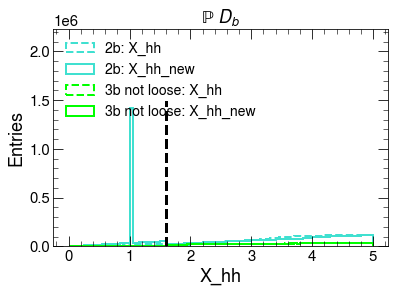

In [86]:
nb = 100
r = (0,5)

plt.hist(df_2b['Xhh'],nb,r,color='turquoise',histtype='step',label='2b: X_hh',lw=2,ls='--')
plt.hist(df_2b['Xhh_new'],nb,r,color='turquoise',histtype='step',label='2b: X_hh_new',lw=2)

plt.hist(df_3b.loc[(df_3b.ntag == 3 )& (df_3b.j3_Db == 1) & (df_3b.Xhh > 1.6),'Xhh'],
         nb,r,color='lime',histtype='step',label='3b not loose: X_hh',lw=2,ls='--')
plt.hist(df_3b.loc[(df_3b.ntag == 3 )& (df_3b.j3_Db == 1) & (df_3b.Xhh_new >1.6),'Xhh_new'],
         nb,r,color='lime',histtype='step',label='3b not loose: X_hh_new',lw=2)

ylim = plt.ylim()
plt.plot([1.6]*2,ylim,'k--')

plt.ylim(0,ylim[1]*1.5)

plt.xlabel('X_hh',fontsize=18)
plt.ylabel('Entries',fontsize=18)
plt.legend(loc='upper left',facecolor='w')
plt.title(title)
plt.show()

Substituting with a symbol from Computer Modern.
Substituting with a symbol from Computer Modern.


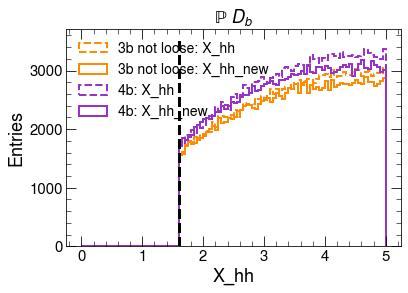

In [89]:


plt.hist(df_3b.loc[(df_3b.ntag == 3 )& (df_3b.j3_Db == 2) & (df_3b.Xhh > 1.6),'Xhh'],
         nb,r,color='darkorange',histtype='step',label='3b not loose: X_hh',lw=2,ls='--')
plt.hist(df_3b.loc[(df_3b.ntag == 3 )& (df_3b.j3_Db == 2) & (df_3b.Xhh_new >1.6),'Xhh_new'],
         nb,r,color='darkorange',histtype='step',label='3b not loose: X_hh_new',lw=2)

plt.hist(df_3b.loc[(df_3b.ntag >= 4 ) & (df_3b.Xhh > 1.6),'Xhh'],
         nb,r,color='darkorchid',histtype='step',label='4b: X_hh',lw=2,ls='--')
plt.hist(df_3b.loc[(df_3b.ntag >= 4 ) & (df_3b.Xhh_new >1.6),'Xhh_new'],
         nb,r,color='darkorchid',histtype='step',label='4b: X_hh_new',lw=2)


ylim = plt.ylim()
plt.plot([1.6]*2,ylim,'k--')

plt.xlabel('X_hh',fontsize=18)
plt.ylabel('Entries',fontsize=18)
plt.legend(loc='upper left')
plt.title(title)
plt.show()

ok ok, so it looks like the message is similar here that the yields will be similar when we extrap into the SR.

Anyhoo - 


Ugh... this is imperceptible - does this jive w/ our intuition??

Substituting with a symbol from Computer Modern.
Substituting with a symbol from Computer Modern.


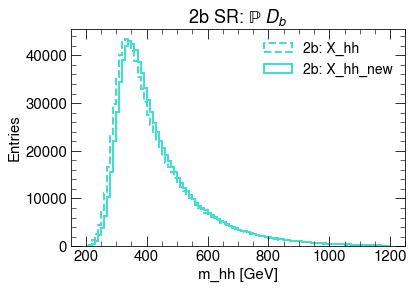

In [76]:
nb,r = 100, (200,1200)

plt.hist(df_2b.loc[df_2b['Xhh']<1.6,'m_hh'],nb,r,color='turquoise',histtype='step',
         label='2b: Xhh',lw=2,ls='--')
plt.hist(df_2b.loc[df_2b['Xhh_new']<1.6,'m_hh'],nb,r,color='turquoise',histtype='step',
         label='2b: Xhh_new',lw=2)


plt.xlabel('m_hh [GeV]')
plt.ylabel('Entries')
plt.legend()
plt.title(f'2b SR: {title}')
plt.show()


Hmmmmm - this seems undesirable that the new SR shifts the bkg *higher*, but I believe the ultimate test is if we have better $s / \sqrt{b}$

In [77]:
np.sum(df_2b['Xhh_new']<1.6)/np.sum(df_2b['Xhh']<1.6)

0.9896106251877718

In [78]:
mu_x1 = []
mu_y1 = []

for delta, r_VR in tqdm(zip(deltas.flatten(), r_VRs.flatten())):


    VR = np.sqrt((df_2b['m_h1'] - x1 * (1+delta))**2 + (df_2b['m_h2'] - y1 * (1+delta))**2) < r_VR
    VR = VR & (df_2b.Xhh_new > 1.6)

    mu_x1.append(df_2b.loc[VR,'m_h1'].mean())
    mu_y1.append(df_2b.loc[VR,'m_h2'].mean())
    

77it [01:00,  1.28it/s]


Substituting with a symbol from Computer Modern.


[[ 3.2548115   3.96791581]
 [ 2.94949798  4.86642394]
 [ 2.82277568  5.98426409]
 [ 3.07236934  7.70505478]
 [ 4.53728987 11.86281874]
 [ 6.87827145 15.55974004]
 [        nan 15.09820431]]
[[ 8.31727632  2.13190866]
 [ 7.26819055  0.49082914]
 [ 6.44846015  1.29566073]
 [ 6.0241835   3.57722191]
 [ 6.8266538   7.99049427]
 [10.84843582 16.02828371]
 [        nan 16.1626155 ]]


Substituting with a symbol from Computer Modern.


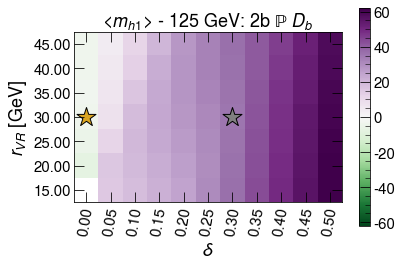

Substituting with a symbol from Computer Modern.
Substituting with a symbol from Computer Modern.


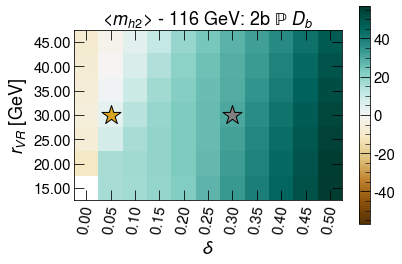

In [81]:
for mus, cmap, mean, var in zip([mu_x1,mu_y1],['PRGn_r','BrBG'],[x1,y1],['$m_{h1}$','$m_{h2}$']):
    
    z = np.array(mus).reshape(7,11) - mean
    
    v = np.max(np.abs(np.nan_to_num(z)))
    
    plt.figure()
    plt.imshow(z, cmap=cmap, vmin=-v, vmax=v, origin='lower')
    plt.colorbar()
    
    plt.xticks(range(11),[f'{d:.2f}' for d in deltas[0]],rotation=80)
    plt.yticks(range(7),[f'{r:.2f}' for r in r_VRs[:,0]])
    
    ax = plt.gca()
    ax.tick_params(which='minor', length=0)
    
    plt.xlabel('$\delta$',fontsize=18)
    plt.ylabel('$r_{VR}$ [GeV]', fontsize=18)
    
    plt.title(f'<{var}> - {mean} GeV: 2b {title}')
    
    # Put a star on the plot
    plt.scatter([6],[3],400,color='grey',marker='*',edgecolors='k')
            
    # And *also* put a gold star on the plot for where the optimal point w/ r_VR = 30 GeV
    j = np.argmin(np.abs(z[3]))
    plt.scatter([j],[3],400,color='goldenrod',marker='*',edgecolors='k')
    
    print(np.abs(z[::-1,:2]))
    

Alright - the *same* story played out that we don't need to have this $\delta$ offset.

### Barelling ahead to the CR

Ok, so to incorporate the optimizations from the previous 2 steps, I think it's important to define a *new* variable: `kr_new` incorporting the *new* SR and VR from the opt

In [82]:
df_2b['kr_new'] = 3
df_2b.loc[df_2b.Xhh_new < 1.6,'kr_new'] = 0

VR_new = np.sqrt((df_2b['m_h1'] - x0)**2 + (df_2b['m_h2'] - y0)**2) < 30
df_2b.loc[VR_new & (df_2b.kr_new != 0)] = 1


In [83]:
nu_x1 = []
nu_y1 = []

epsilons, r_CRs = np.meshgrid(np.linspace(0,.1,11),np.linspace(30,60,7))

for eps, r_CR in tqdm(zip(epsilons.flatten(), r_CRs.flatten())):


    CR = np.sqrt((df_2b['m_h1'] - x1 * (1+eps))**2 + (df_2b['m_h2'] - y1 * (1+eps))**2) < r_CR
    CR = CR & (df_2b.kr_new != 0) & (df_2b.kr_new != 1)

    nu_x1.append(df_2b.loc[CR,'m_h1'].mean())
    nu_y1.append(df_2b.loc[CR,'m_h2'].mean())
    

77it [01:11,  1.08it/s]


Substituting with a symbol from Computer Modern.


[[ 2.90256688  1.29652817]
 [ 1.86080829  0.08571567]
 [ 0.53887882  1.53009053]
 [ 1.46484441  4.00700076]
 [ 5.26419683  8.98506043]
 [11.61781751 13.45784703]
 [13.84728501 14.88898581]]
[[11.64379812 10.29409522]
 [ 9.54562839  8.04764523]
 [ 7.2134389   5.46292825]
 [ 4.22307034  2.0512553 ]
 [ 0.70394027  3.9752453 ]
 [ 8.8201896  10.06818107]
 [13.3721563  13.52487494]]


Substituting with a symbol from Computer Modern.


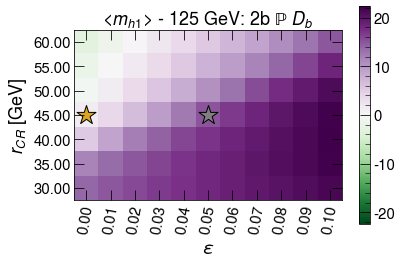

Substituting with a symbol from Computer Modern.
Substituting with a symbol from Computer Modern.


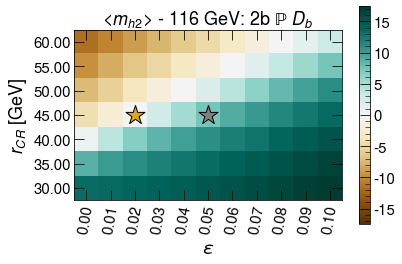

In [84]:
for mus, cmap, mean, var in zip([nu_x1,nu_y1],['PRGn_r','BrBG'],[x1,y1],['$m_{h1}$','$m_{h2}$']):
    
    z = np.array(mus).reshape(7,11) - mean
    
    v = np.max(np.abs(np.nan_to_num(z)))
    
    plt.figure()
    plt.imshow(z, cmap=cmap, vmin=-v, vmax=v, origin='lower')
    plt.colorbar()
    
    plt.xticks(range(11),[f'{d:.2f}' for d in epsilons[0]],rotation=80)
    plt.yticks(range(7),[f'{r:.2f}' for r in r_CRs[:,0]])
    
    ax = plt.gca()
    ax.tick_params(which='minor', length=0)
    
    plt.xlabel(r'$\varepsilon$',fontsize=18)
    plt.ylabel('$r_{CR}$ [GeV]', fontsize=18)
    
    plt.title(f'<{var}> - {mean} GeV: 2b {title}')
    
    # Put a star on the plot
    plt.scatter([5],[3],400,color='grey',marker='*',edgecolors='k')
            
    # And *also* put a gold star on the plot for where the optimal point w/ r_VR = 30 GeV
    j = np.argmin(np.abs(z[3]))
    plt.scatter([j],[3],400,color='goldenrod',marker='*',edgecolors='k')
    
    print(np.abs(z[::-1,:2]))
    

Lol - the gold stars are conflicting rn haha. 

For now - let's say this optimization returned $\varepsilon = 0.01$ and $r_{CR} = 45$ GeV.

## Would peeking @ 2b + 2 loose be useful here too??

Honestly - I can't see why not!!

(I'll do this in another nb - I'm running out of memory right here haha)